In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
colormap = {
    1.0 : 'red',
    2.0 : 'orange',
    4. : 'yellow',
    8. : 'green',
    32. : 'cyan',
    128. : 'blue',
    512. : 'violet',
    2048. : 'black',
    64. : 'lightblue',
    8192. : 'grey',
    32768. : 'magenta',
    2.**16 : 'coral'
}

In [195]:
data = pd.read_csv('experiments/margin_0.1_data.csv')
data = data[(data['R'] < 400000) & (data['M'] < 20) & (data['M'] > 4)]
#data = data[(data['R'] < 400000)]

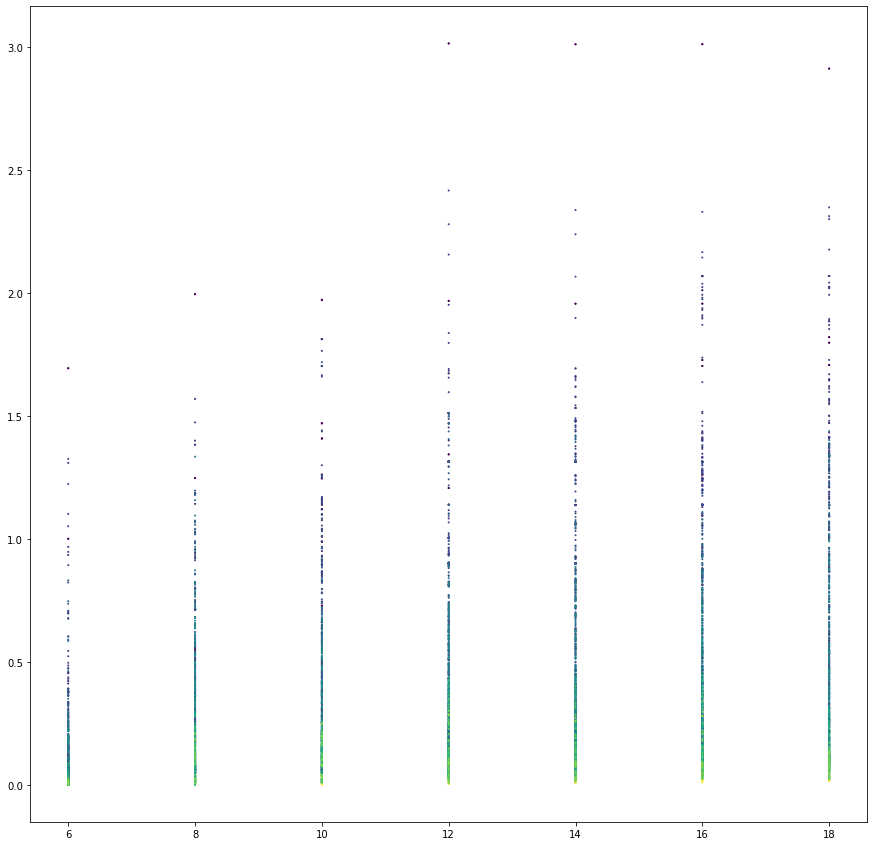

In [196]:
Ms = list(set(data['M']))
Ms.sort()
Ms = np.array(Ms)
shots = list(set(data['R']))
compressed_data = pd.DataFrame(columns=['M','R','mean','std','max','min','n'])
for M in Ms:
    for R in shots:
        mean = np.mean(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        std = np.std(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        max = np.max(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        min = np.min(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        n = len(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        compressed_data.loc[compressed_data.shape[0]] = [M,R,mean,std,max,min,n]
plt.figure(figsize=(15,15))
colors = np.log(data['R'])
plt.scatter(data['M'],data['epsilon'],s=1,c=colors,cmap='viridis')

In [208]:
epsilons, h = np.linspace(0,0.5,100,retstep=True)
R_needed = np.zeros((len(epsilons),len(Ms)))
for j, e in enumerate(epsilons):
    for i, M in enumerate(Ms):
        data_M = compressed_data[compressed_data['M'] ==  M]
        filter = np.abs(np.array(data_M['min'])) < e
        R_needed[j,i] = np.min(data_M['R'][filter])

** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
9.405325121081176e-08
9.452721611104393e-08
3.6540762043739138e-06
4.850287368721101e-06
5.9587602232142035e-06
9.792039241392283e-06
9.865922551110944e-06
1.9040928771791796e-05
3.1554314280312064e-05
0.0003662369384390198
3.7138037680236795e-05
3.08296749994454e-05
3.08296749994454e-05
3.08296749994454e-05
3.0854143295572124e-05
3.2596902025074816e-05
3.469401164408699e-05
3.57540608886876e-05
0.0014777345448836856
0.0034994633086651615
0.0034994633086651615
0.0034994633086651615
0.0034994633086651615
0.0034994633086651615
0.003158686143387515
0.003158686143387515
0.003217636758086405
0.003217636758086405
0.003217636758086405
0.003217636758086405
0.003217636758086405
0.003217636758086405
0.003217636758086405
0.003217636758086405
0.004587888535280394
0.004587888535280394
0.004587888535280394
0.00

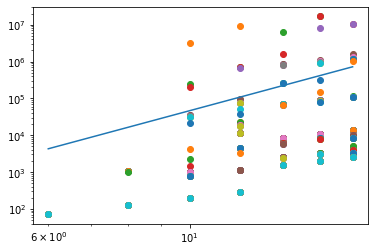

In [209]:
exponents = []
new_eps = []
for j, e in enumerate(epsilons):
    try:
        plt.scatter(Ms,Ms**2*R_needed[j,:],label=e)
        plt.xscale('log')
        plt.yscale('log')
        p = np.polyfit(np.log(Ms),np.log(Ms**2*R_needed[j,:]),1)
        print(np.exp(p[1]))
        exponents.append(p[0])
        new_eps.append(e)
    except:
        continue
plt.plot(Ms,Ms**(14/3))

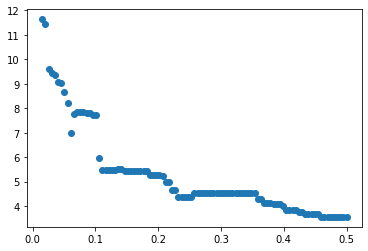

In [210]:
plt.scatter(new_eps,exponents)

In [206]:
np.mean(exponents)

4.551209366834596

In [155]:
def get_R(a,b,c,d,eps,M):
    return c*(M**a/eps**b) + d

fun = lambda x: get_R(x[0],x[1],x[2],x[3],data['epsilon'],data['M']) - data['R']

In [202]:
x0 = [4,2,1,0]
np.linalg.norm(fun(x0))

77144750162.39392

In [203]:
from scipy.optimize import leastsq
x = leastsq(fun,x0)[0]
print(x)
print(np.linalg.norm(fun(x)))

[5.34606914e+00 1.18129859e+00 6.50895871e-05 1.10720901e+03]
577805.8637300961
